In [1]:
import numpy as np
import os
import glob
import topofisher
from topofisher.filtrations.numpy.alphaDTML import AlphaDTMLayer
from topofisher.filtrations.numpy.default_filtrations import AlphaFiltration
from topofisher.vectorizations.numpy.custom_vectorizations import TOPK
from topofisher.vectorizations.numpy.vectorization_layer import VectorizationLayers
import matplotlib.pyplot as plt
from topofisher.fisher.Fisher import show_fm_and_bias, fisherMOPED
import tensorflow as tf
import importlib
importlib.reload(topofisher.fisher.imnn)
from topofisher.fisher.imnn import IMNNLayer, MopedLayer, ExtraDimLayer

2023-10-20 19:45:47.958695: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 19:45:55.154418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
import importlib
importlib.reload(topofisher.filtrations.numpy.default_filtrations)
from topofisher.filtrations.numpy.default_filtrations import AlphaFiltration

In [ ]:
pts = []
for idx in range(2):
    folder_path = "/Users/karthikviswanathan/Downloads/ForKarthik/sancho_new/" + str(idx) 
    file_pattern = os.path.join(folder_path, '*.npz')
    # npz_files = glob.glob(file_pattern)
    file_name = glob.glob(file_pattern)[0]
    cat = np.load(file_name)
    pos = cat['pos']        # shape: (N_galaxies, 3) --> X,Y,Z position of each galaxy in Mpc/h
    # vel = cat['vel']        # shape: (N_galaxies, 3) --> Vx, Vy, Vz velocity of the galaxy in km/s
    # gtype = cat['gtype']    # shape: scalar --> Type of galaxy, central: 1, satellite: 0
    pts.append(pos)

In [ ]:
from topofisher.vectorizations.tensorflow.custom_vectorizations import TOPK_TF
from topofisher.vectorizations.tensorflow.vectorization_layer import VectorizationLayers_TF

In [ ]:
all_simplex_trees = []; 
filtLayer = AlphaDTMLayer(num_nn = 15, max_hom_dim = 3, hom_dim_list = [0, 1, 2], show_tqdm = True)
pds = filtLayer.find_persistence_diagrams(pts)

In [ ]:
vectorizations = [TOPK(bdp_type = "bd", is_binned = False), TOPK(bdp_type = "bd", is_binned = False),\
                  TOPK(bdp_type = "bd", is_binned = False)]
vecLayer = VectorizationLayers(vectorizations = vectorizations)
%timeit -n 1 -r 1 vecs = vecLayer.vectorize_persistence_diagrams(pds)

In [ ]:
vectorizations

In [ ]:
plt.plot(np.log(vecs.T))

In [ ]:
vectorizations[2]

In [79]:
import numpy as np
 
def cleanPD(pd, cut, power=0.5):
    p0 = []
    p1 = []
    p2 = []
    for elm in pd:
        if elm[0] == 2 and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:
            p2.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])
        elif elm[0] == 1 and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:
            p1.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])
        elif (np.isinf(elm[1][1])) == False and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:
            p0.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])
    return np.array(p0), np.array(p1), np.array(p2)
  
binNum = 10 # Number of bins in each histogram. If this number is 10, then the b0+b1+b2+p0+p1+p2+d0+d1+d2 data vector will be 10*9=90-bin long
 
############################################################################ This part below is for getting the bins from a reference pd that you will keep using
diag = np.load('/Users/karthikviswanathan/Downloads/fiducial_575_600_15/fiducial_0_3_1099_15.npy')
diag = [[elm[0], [elm[1], elm[2]]] for elm in diag]  # [dimension, [birth, death]]
a0, a1, a2 = cleanPD(diag, 0, float(1))  # aX = [[birth, persistence], [item 2], [item 3]]
 
datab0 = a0[:, 0]
datab1 = a1[:, 0]
datab2 = a2[:, 0]
datap0 = a0[:, 1]
datap1 = a1[:, 1]
datap2 = a2[:, 1]
datad0 = a0[:, 0] + a0[:, 1]
datad1 = a1[:, 0] + a1[:, 1]
datad2 = a2[:, 0] + a2[:, 1]
 
datab0_up = np.percentile(datab0, 99.9)
datab1_up = np.percentile(datab1, 99.9)
datab2_up = np.percentile(datab2, 99.9)
datab0_do = np.percentile(datab0, 0.01)
datab1_do = np.percentile(datab1, 0.01)
datab2_do = np.percentile(datab2, 0.01)
datap0_up = np.percentile(datap0, 99.9)
datap1_up = np.percentile(datap1, 99.9)
datap2_up = np.percentile(datap2, 99.9)
datap0_do = np.percentile(datap0, 0.01)
datap1_do = np.percentile(datap1, 0.01)
datap2_do = np.percentile(datap2, 0.01)
datad0_up = np.percentile(datad0, 99.9)
datad1_up = np.percentile(datad1, 99.9)
datad2_up = np.percentile(datad2, 99.9)
datad0_do = np.percentile(datad0, 0.01)
datad1_do = np.percentile(datad1, 0.01)
datad2_do = np.percentile(datad2, 0.01)
 
datab0 = datab0[np.where(datab0<=datab0_up)]
datab1 = datab1[np.where(datab1<=datab1_up)]
datab2 = datab2[np.where(datab2<=datab2_up)]
datab0 = datab0[np.where(datab0>=datab0_do)]
datab1 = datab1[np.where(datab1>=datab1_do)]
datab2 = datab2[np.where(datab2>=datab2_do)]
datap0 = datap0[np.where(datap0<=datap0_up)]
datap1 = datap1[np.where(datap1<=datap1_up)]
datap2 = datap2[np.where(datap2<=datap2_up)]
datap0 = datap0[np.where(datap0>=datap0_do)]
datap1 = datap1[np.where(datap1>=datap1_do)]
datap2 = datap2[np.where(datap2>=datap2_do)]
datad0 = datad0[np.where(datad0<=datad0_up)]
datad1 = datad1[np.where(datad1<=datad1_up)]
datad2 = datad2[np.where(datad2<=datad2_up)]
datad0 = datad0[np.where(datad0>=datad0_do)]
datad1 = datad1[np.where(datad1>=datad1_do)]
datad2 = datad2[np.where(datad2>=datad2_do)]

bins0 = [np.histogram(datab0, bins=binNum)[1], np.histogram(datad0, bins=binNum)[1], np.histogram(datap0, bins=binNum)[1]]
bins1 = [np.histogram(datab1, bins=binNum)[1], np.histogram(datad1, bins=binNum)[1], np.histogram(datap1, bins=binNum)[1]]
bins2 = [np.histogram(datab2, bins=binNum)[1], np.histogram(datad2, bins=binNum)[1], np.histogram(datap2, bins=binNum)[1]]


In [80]:
binsd2_binNum

array([ 6.34127903, 10.46168718, 14.58209534, 18.70250349, 22.82291164,
       26.9433198 , 31.06372795, 35.1841361 , 39.30454426, 43.42495241,
       47.54536057])

### TOPK BP

In [2]:
directory_path = '/Users/karthikviswanathan/Downloads/bp'

# Find all pickle files in the directory
pickle_files = glob.glob(os.path.join(directory_path, '*.pkl'))
fid_vecs = []
der_vecs = {}
param_list = ["Om_m", "Om_p", "s8_m", "s8_p"]
for item in param_list : der_vecs[item] = []

In [3]:
# Iterate through pickle files and read them
import pickle
for file_path in pickle_files:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        fid_vecs.append(data[0]['fiducial'])
        # print(data[0].keys())
        for item in param_list : der_vecs[item].append(data[1][item])

In [4]:
der_arr = [np.concatenate(der_vecs[item], axis = 0) for item in param_list]
fid_arr = np.concatenate(fid_vecs, axis = 0)

In [5]:
fish = fisherMOPED([fid_arr, *der_arr], np.array([0.02, 0.03]))

In [6]:
show_fm_and_bias(fish)
print("Log FI = ", fish.lnDetF.numpy())

log FI =  21.92
FM =  [146810.1   61641.2   61641.2   48387.14]
Fractional bias =  [0.09 0.1 ]
Log FI =  21.918427


In [7]:
print("Fisher forecast = ", fish.invFM.numpy().flatten())

Fisher forecast =  [ 1.4644651e-05 -1.8656068e-05 -1.8656068e-05  4.4432927e-05]


In [8]:
print("Fisher forecast = ", np.sqrt(np.diag(fish.invFM.numpy())))

Fisher forecast =  [0.00382683 0.0066658 ]


/Users/karthikviswanathan/Desktop/TDA/codes/fisherPH/versions/TopoFisher/topofisher/cluster/outputs/run0/plots


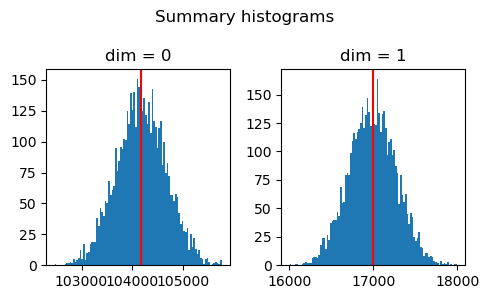

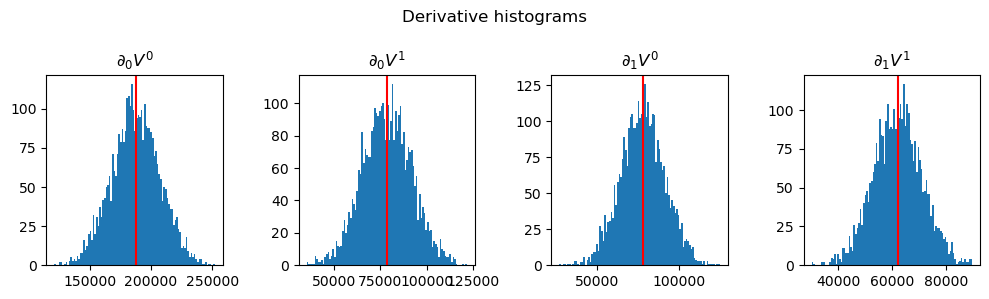

In [12]:

from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists, plot_derivative_convergence
plotSummaryDerivativeHists(fish, "/Users/karthikviswanathan/Desktop/TDA/codes/fisherPH/versions/TopoFisher/topofisher/cluster/outputs/run0/plots")

#### $\Omega_m$

In [230]:
fish = fisherMOPED([fid_arr, *der_arr[:2]], np.array([0.02]))

In [231]:
show_fm_and_bias(fish)
print("Log FI = ", fish.lnDetF.numpy())

FM =  [146796.84]
Fractional bias =  [0.01]
Log FI =  11.896805


In [15]:
fish.fractional_bias

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.09332732, 0.10262736])>

In [232]:
print("Fisher forecast = ", fish.invFM.numpy().flatten())

Fisher forecast =  [6.812136e-06]


In [233]:
print("Fisher forecast = ", np.sqrt(np.diag(fish.invFM.numpy())))

Fisher forecast =  [0.00261001]


#### $\sigma_8$

In [235]:
fish = fisherMOPED([fid_arr, *der_arr[2:]], np.array([0.03]))

In [236]:
show_fm_and_bias(fish)
print("Log FI = ", fish.lnDetF.numpy())

FM =  [48384.09]
Fractional bias =  [0.02]
Log FI =  10.786926


In [237]:
print("Fisher forecast = ", fish.invFM.numpy().flatten())

Fisher forecast =  [2.066795e-05]


In [238]:
print("Fisher forecast = ", np.sqrt(np.diag(fish.invFM.numpy())))

Fisher forecast =  [0.0045462]


#### Contours for each dimension 

##### Some plots

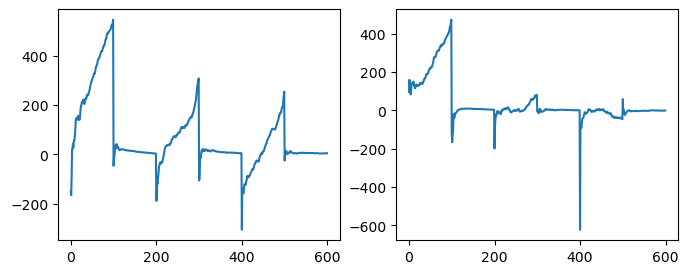

In [14]:
ncols = 2
fig, axes = plt.subplots(nrows=1, ncols= ncols, \
                             figsize=(3 * ncols + 2 , 3))
axes[0].plot(der_arr[1][0] - der_arr[0][0])
axes[1].plot(der_arr[3][0] - der_arr[2][0])
# plt.plot()

In [129]:
all_vecs = [fid_arr, *der_arr]
fish = topofisher.fisher.Fisher.fisherFromVecs(all_vecs, np.array([0.02, 0.03]), name = "PD-all")

In [ ]:
def readFromFile(fileName) :
    f = open(fileName, "rb")
    PD = pickle.load(f)
    f.close()
    return PD
op100 = readFromFile('/Users/karthikviswanathan/Downloads/op100.pkl')

In [ ]:
pi_imnn_layer.history

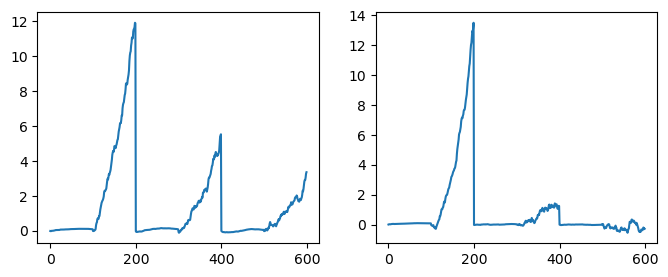

In [121]:
weight = np.diag(fish.C)
ncols = 2
fig, axes = plt.subplots(nrows=1, ncols= ncols, \
                             figsize=(3 * ncols + 2 , 3))
axes[0].plot((der_arr[1][0] - der_arr[0][0])/weight)
axes[1].plot((der_arr[3][0] - der_arr[2][0])/weight)

#### Topk plot

In [123]:
np.arange(100, 104)

array([100, 101, 102, 103])

In [148]:
def getFish(vecs, topks_new):
    b0, b1 = topks_new
    inds = np.concatenate([np.arange(b0, dtype = np.int32), np.arange(100, 100 + b0,dtype = np.int32), np.arange(200, 200 + b1,dtype = np.int32), np.arange(300, 300 + b1, dtype = np.int32)])
    fisher_vecs = [vec[:,inds] for vec in vecs]
    fish = fisherMOPED(fisher_vecs, delta_theta)
    fishMatrix = fish.FM.numpy().flatten()
    return fishMatrix[0], fishMatrix[-1], fish.lnDetF

In [156]:
fisher_dict = {}
k0r = np.linspace(1, 100, 20)
k1r = np.linspace(1, 100, 20)
graph_list = []
for idx1 in tqdm(k1r):
    for idx0 in k0r:
        inds = (idx0, idx1)
        fisher_dict[inds] = getFish(all_vecs, inds) 

100%|██████████| 20/20 [02:11<00:00,  6.56s/it]


In [157]:
graph_list = []
def getTopK(tp):
    # print(tval)
    dic = {}
    for idx1 in k1r:
        lis = []
        for idx0 in k0r:
            inds = (idx0, idx1)
            lis.append(fisher_dict[inds][tp])
        dic[idx1] = lis
    return dic

for idx in range(3): 
    graph_list.append(getTopK(idx))

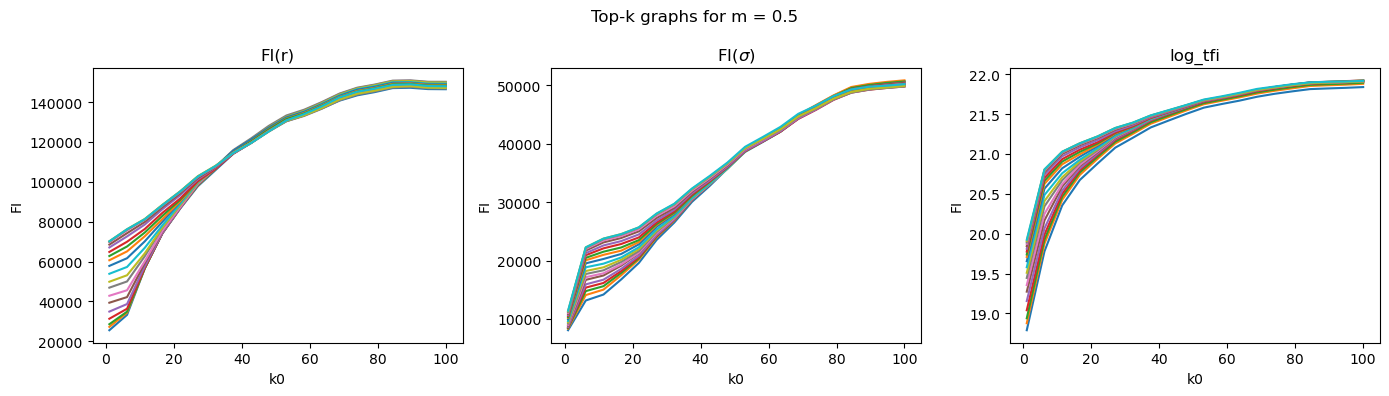

In [159]:
def plotTopK(dic, ax, title):
    for idx in k1r: 
        ax.plot(k0r, dic[idx], label = "k1 = " + str(idx))
        
    
    ax.set_xlabel('k0')
    ax.set_title(title)
    ax.set_ylabel('FI')

  #  ax.axhline(tval, linestyle = 'dashed', c = 'red', label = "TFM", alpha = 0.7)

# log_tfi = np.log(np.linalg.det(tfm)) 
# tfi_lis = [tfm[0,0], tfm[-1,-1], log_tfi]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))   
names = ['FI(r)', 'FI($\sigma$)', 'log_tfi']

for idx in range(3): 
    plotTopK(graph_list[idx], axes[idx], names[idx])
    
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc = 'lower right')
fig.suptitle("Top-k graphs for Sancho")
# plt.legend()
plt.tight_layout()
# plt.show()
plt.savefig('plots/circle/topk_graphs_1000.png' , bbox_inches='tight')

##### Checking diagram wise

In [24]:
fishers = []
all_vecs = [fid_arr, *der_arr]
for idx in range(3):
    all_vecs_temp = [item[:, idx*200: idx*200 + 200] for item in all_vecs]
    fishers.append(fisherMOPED(all_vecs_temp, np.array([0.02, 0.03]), name = "PD" + str(idx)))
fishers.append(fisherMOPED(all_vecs, np.array([0.02, 0.03]), name = "PD-all"))

In [28]:
print("For the topk summary statisitics - ")
for fisher in fishers : 
    print("\nFisher analysis using ", fisher.name)
    show_fm_and_bias(fisher)

For the topk summary statisitics - 

Fisher analysis using  PD0
FM =  [145401.28  66175.16  66175.17  50880.87]
Fractional bias =  [0.08 0.09]

Fisher analysis using  PD1
FM =  [60539.42 10076.16 10076.16  3549.6 ]
Fractional bias =  [0.45 0.79]

Fisher analysis using  PD2
FM =  [46703.33  4942.61  4942.61  1533.5 ]
Fractional bias =  [0.78 1.97]

Fisher analysis using  PD-all
FM =  [146810.1   61641.2   61641.2   48387.14]
Fractional bias =  [0.09 0.1 ]


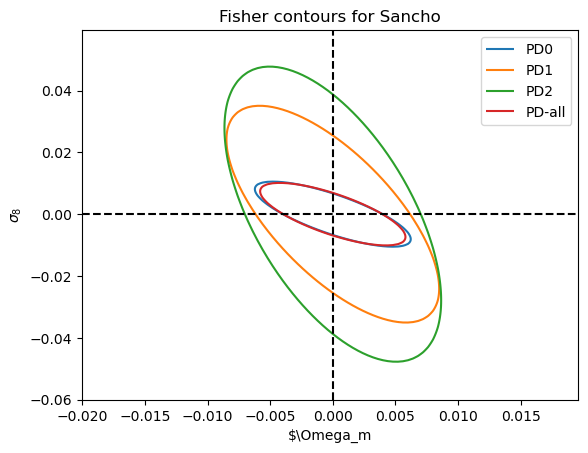

In [45]:
import matplotlib.colors as mcolors
from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists
fisher_matrices = [fisher.FM.numpy() for fisher in fishers]
names = [fisher.name for fisher in fishers]
colors = list(mcolors.TABLEAU_COLORS)
plotContours2D(fisher_matrices, names, [0., 0.],\
             title = 'Fisher contours for Sancho',
             colors = colors, theta_arr = [2*np.arange(-0.01, 0.01, 2e-4), \
                         2*np.arange(-0.03, 0.03, 2e-4)], \
             parameter_list = ["$\Omega_m", "$\sigma_8$"])
            # file_loc = "plots/lss/fc_parts_of_pd.png")

##### Checking feature wise

In [97]:
fishers = []
all_vecs = [fid_arr, *der_arr]
interval = 100
for idx in range(600//interval):
    all_vecs_temp = [item[:, idx*interval: (idx + 1)*interval ] for item in all_vecs]
    bp = "p" if idx%2 else "b" 
    fishers.append(fisherMOPED(all_vecs_temp, np.array([0.02, 0.03]), name = bp + str(idx//2)))
fishers.append(fisherMOPED([item[:, 200: ] for item in all_vecs], np.array([0.02, 0.03]), name = "PD12"))
fishers.append(fisherMOPED(all_vecs, np.array([0.02, 0.03]), name = "PD-all"))

In [98]:
print("For the topk summary statisitics - ")
for fisher in fishers : 
    print("\nFisher analysis using ", fisher.name)
    show_fm_and_bias(fisher)

For the topk summary statisitics - 

Fisher analysis using  b0
FM =  [136521.39  63959.36  63959.37  37326.76]
Fractional bias =  [0.21 0.23]

Fisher analysis using  p0
FM =  [131378.55  58896.8   58896.81  46170.59]
Fractional bias =  [0.09 0.09]

Fisher analysis using  b1
FM =  [59473.68  9189.    9189.    2433.51]
Fractional bias =  [0.62 0.97]

Fisher analysis using  p1
FM =  [51720.58 11778.88 11778.88  3216.19]
Fractional bias =  [3.76 4.33]

Fisher analysis using  b2
FM =  [46416.42  4194.7   4194.7    691.97]
Fractional bias =  [2.09 3.66]

Fisher analysis using  p2
FM =  [38618.81  4646.6   4646.6   1515.15]
Fractional bias =  [1.12 2.58]

Fisher analysis using  PD12
FM =  [65402.35 10619.52 10619.52  4332.52]
Fractional bias =  [0.35 0.69]

Fisher analysis using  PD-all
FM =  [146810.1   61641.2   61641.2   48387.14]
Fractional bias =  [0.09 0.1 ]


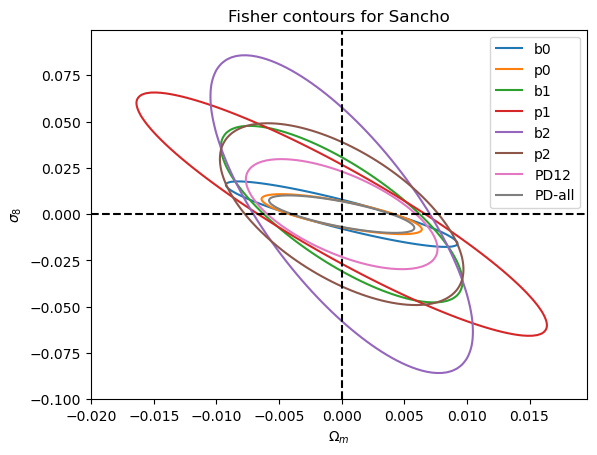

In [99]:
import matplotlib.colors as mcolors
from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists
fisher_matrices = [fisher.FM.numpy() for fisher in fishers]
names = [fisher.name for fisher in fishers]
colors = list(mcolors.TABLEAU_COLORS)
plotContours2D(fisher_matrices, names, [0., 0.],\
             title = 'Fisher contours for Sancho',
             colors = colors, theta_arr = [2*np.arange(-0.01, 0.01, 2e-4), \
                         2*np.arange(-0.05, 0.05, 2e-4)], \
             parameter_list = ["$\Omega_m$", "$\sigma_8$"])
            # file_loc = "plots/lss/fc_parts_of_pd.png")

#### Other checks

In [ ]:

from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists, plot_derivative_convergence
plotSummaryDerivativeHists(fish)

In [ ]:
import tensorflow as tf

from topofisher.fisher.imnn import IMNNLayer, MopedLayer, ExtraDimLayer
all_vecs = tf.stack([fid_arr[:7500], *der_arr])
delta_theta = np.array([0.02, 0.03])
comp = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2)])
imnn_layer = IMNNLayer(comp, verbose = 1, epochs = 40, data_splits = [0.4, 0.2, 0.4])
fish = imnn_layer.computeFisher(all_vecs, delta_theta)

In [ ]:
show_fm_and_bias(fish)

In [ ]:
print("Fisher forecast = ", np.sqrt(np.diag(fish.invFM.numpy())))

### TOPK BDP

In [ ]:
directory_path = '/Users/karthikviswanathan/Downloads/bdp'

# Find all pickle files in the directory
pickle_files = glob.glob(os.path.join(directory_path, '*.pkl'))
fid_vecs = []
der_vecs = {}
param_list = ["Om_m", "Om_p", "s8_m", "s8_p"]
for item in param_list : der_vecs[item] = []

In [ ]:
# Iterate through pickle files and read them
import pickle
for file_path in pickle_files:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        fid_vecs.append(data[0]['fiducial'])
        # print(data[0].keys())
        for item in param_list : der_vecs[item].append(data[1][item])

In [ ]:
der_arr = [np.concatenate(der_vecs[item], axis = 0) for item in param_list]
fid_arr = np.concatenate(fid_vecs, axis = 0)
fid_arr.shape

In [ ]:
fish = fisherMOPED([fid_arr, *der_arr], np.array([0.02, 0.03]))

In [ ]:
show_fm_and_bias(fish)

In [ ]:
print("Fisher forecast = ", fish.invFM.numpy().flatten())

In [ ]:
print("Fisher forecast = ", np.sqrt(np.diag(fish.invFM.numpy())))

In [ ]:

from topofisher.fisher.plot_fisher_stats import plotContours2D, plotSummaryDerivativeHists, plot_derivative_convergence
plotSummaryDerivativeHists(fish)

In [ ]:
import tensorflow as tf

from topofisher.fisher.imnn import IMNNLayer, MopedLayer, ExtraDimLayer
all_vecs = tf.stack([fid_arr[:7500], *der_arr])
delta_theta = np.array([0.02, 0.03])
comp = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2)])
imnn_layer = IMNNLayer(comp, verbose = 1, epochs = 40, data_splits = [0.4, 0.2, 0.4])
fish = imnn_layer.computeFisher(all_vecs, delta_theta)

In [ ]:
show_fm_and_bias(fish)

In [ ]:
print("Fisher forecast = ", np.sqrt(np.diag(fish.invFM.numpy())))

### Persistence Images

In [81]:
directory_path = '/Users/karthikviswanathan/Downloads/pers_images_scratch_32'

# Find all pickle files in the directory
pickle_files = glob.glob(os.path.join(directory_path, '*/*.pkl'))
all_vecs = {}
param_list = ["fiducial", "Om_m", "Om_p", "s8_m", "s8_p"]
for item in param_list : all_vecs[item] = []

In [82]:
# Iterate through pickle files and read them
import pickle,tqdm
from tqdm import tqdm
for file_path in pickle_files:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        param = file_path.split("/")[-2][12:]
        all_vecs[param].append(data)
        # print(data.shape)

In [83]:
all_arr = [np.concatenate(all_vecs[item], axis = 0) for item in tqdm(param_list)]
all_arr = [np.transpose(item, (0, 2, 3, 1)) for item in tqdm(all_arr)]

100%|██████████| 5/5 [00:00<00:00, 1398.94it/s]


In [85]:
all_arr[0] = all_arr[0][:7500]
all_vecs = tf.stack(all_arr, axis = 1)

In [86]:
all_vecs_mean = np.mean(all_vecs, axis = 0)
avm = all_vecs_mean

(5, 32, 32, 3)

In [129]:
fid_pi = all_vecs[:, 0]

In [133]:
pi0 = fid_pi[:, :, :, 0].numpy().reshape(-1, 1024)


In [149]:
np.cov(pi0.T).shape

(1024, 1024)

In [148]:
np.argmax(np.cov(pi0.T))

724675

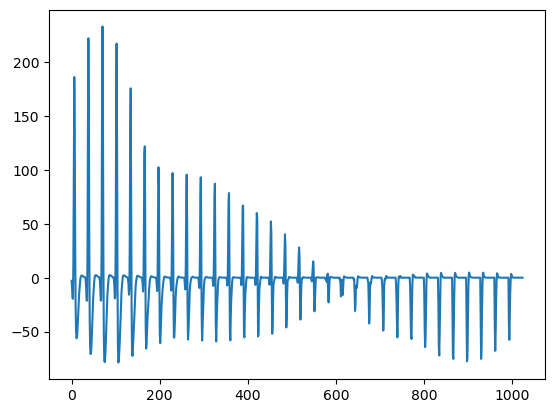

In [147]:
plt.plot(np.cov(pi0.T)[6])

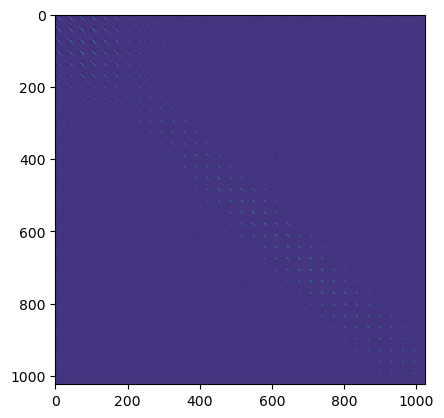

In [140]:
plt.imshow(np.cov(pi0.T))

#### $\Omega_m$

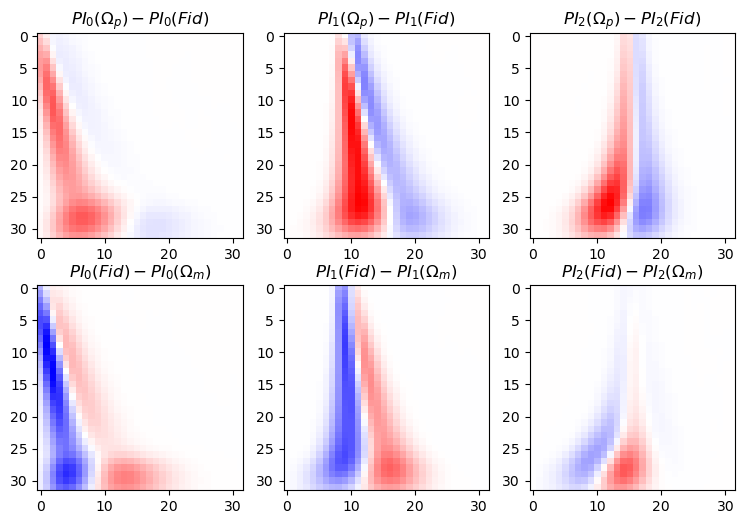

In [121]:
diff1, diff2 = avm[2] - avm[0], avm[0] - avm[1]
ncols = 2
fig, axes = plt.subplots(nrows = 2, ncols= 3, \
                             figsize=(3 * ncols + 3 , 6))

for idx in range(3):
    vm2 = np.max([np.max(np.abs(diff1[:, :, idx])), np.max(np.abs(diff2[:, :, idx]))])
    axes[0][idx].imshow(np.flip(diff1[:, :, idx], axis = 0), cmap = 'bwr', vmin = -vm2, vmax = vm2)
    axes[0][idx].set_title( "$PI_{}(\Omega_p) - PI_{}(Fid)$".format(idx, idx))
    axes[1][idx].imshow(np.flip(diff2[:, :, idx], axis = 0), cmap = 'bwr', vmin = -vm2, vmax = vm2)
    axes[1][idx].set_title( "$PI_{}(Fid) - PI_{}(\Omega_m)$".format(idx, idx))

#### $\sigma_8$

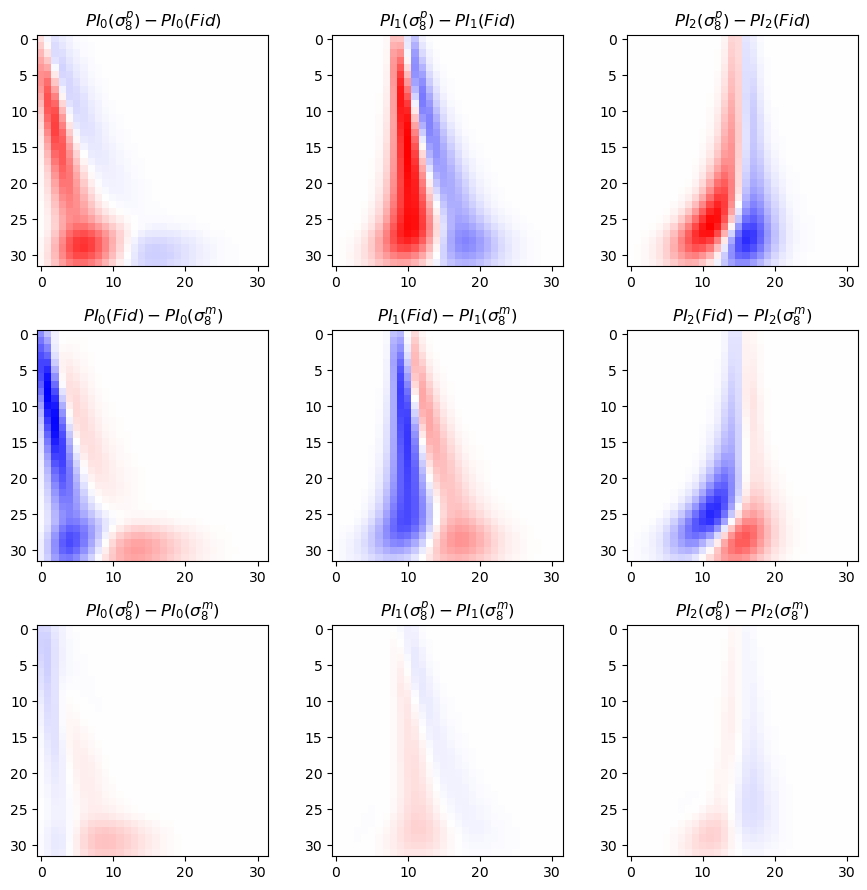

In [128]:
diff1, diff2 = avm[4] - avm[0], avm[0] - avm[3]
ncols = 2
fig, axes = plt.subplots(nrows = 3, ncols= 3, \
                             figsize=(3 * ncols + 3 , 9))

for idx in range(3):
    vm2 = np.max([np.max(np.abs(diff1[:, :, idx])), np.max(np.abs(diff2[:, :, idx]))])
    axes[0][idx].imshow(np.flip(diff1[:, :, idx], axis = 0), cmap = 'bwr', vmin = -vm2, vmax = vm2)
    axes[0][idx].set_title( "$PI_{}(\sigma_8^p) - PI_{}(Fid)$".format(idx, idx))
    axes[1][idx].imshow(np.flip(diff2[:, :, idx], axis = 0), cmap = 'bwr', vmin = -vm2, vmax = vm2)
    axes[1][idx].set_title( "$PI_{}(Fid) - PI_{}(\sigma_8^m)$".format(idx, idx))
    
    axes[2][idx].imshow(np.flip((diff2[:, :, idx] + diff1[:, :, idx])/2, axis = 0), cmap = 'bwr', vmin = -vm2, vmax = vm2)
    axes[2][idx].set_title( "$PI_{}(\sigma_8^p) - PI_{}(\sigma_8^m)$".format(idx, idx))

plt.tight_layout()

#### Doing IMNN

In [ ]:
"""
ExtraDimLayer(tf.keras.layers.Conv2D(res, (3,3), padding='same', \
                                     activation = "relu")),
ExtraDimLayer(tf.keras.layers.Conv2D(2*res, (3,3), padding='same', \
                                     activation = "relu")),
ExtraDimLayer(tf.keras.layers.MaxPooling2D((2, 2), strides=2)),
ExtraDimLayer(tf.keras.layers.Conv2D(2*res, (3,3), padding='same', \
                                     activation = "relu")),
ExtraDimLayer(tf.keras.layers.MaxPooling2D((2, 2), strides=2)),
"""

In [162]:
all_vecs = tf.stack(all_arr, axis = 1)
all_vecs = tf.random.shuffle(all_vecs, seed = 42)
print(all_vecs.shape)
res = 32
model = tf.keras.Sequential(
    [
        ExtraDimLayer(tf.keras.layers.Conv2D(8, (3,3), padding='same', \
                                             activation = "relu", input_shape=(res, res, all_vecs.shape[-1]))),
        ExtraDimLayer(tf.keras.layers.MaxPooling2D((2, 2))),        
        ExtraDimLayer(tf.keras.layers.Flatten()),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(2)
    ]
)
pi_imnn_layer = IMNNLayer(model, verbose = 1, epochs = 40, data_splits = [0.4, 0.2, 0.4], \
                            callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)], stack = False, \
                          show_bias = True, transpose = False, batch_size = 1024)
delta_theta = np.array([0.02, 0.03])
fisher = pi_imnn_layer.computeFisher(all_vecs, delta_theta)

(7500, 5, 32, 32, 3)
Epoch 1/40
3/3 [==============================] - 10s 2s/step - loss: -16.4145 - bias0: 29.6341 - bias1: 30.7540 - val_loss: 0.1959 - val_bias0: 26080.4121 - val_bias1: 26097.7402
Epoch 2/40
3/3 [==============================] - 4s 1s/step - loss: -18.4166 - bias0: 336.0314 - bias1: 323.4209 - val_loss: -19.3495 - val_bias0: 2.0196 - val_bias1: 2.1051
Epoch 3/40
3/3 [==============================] - 4s 1s/step - loss: -18.3740 - bias0: 14.9078 - bias1: 14.9932 - val_loss: -19.9518 - val_bias0: 0.8754 - val_bias1: 0.9515
Epoch 4/40
3/3 [==============================] - 4s 2s/step - loss: -19.3964 - bias0: 1.5264 - bias1: 1.4354 - val_loss: -18.0315 - val_bias0: 2.8476 - val_bias1: 2.0490
Epoch 5/40
3/3 [==============================] - 4s 1s/step - loss: -18.1538 - bias0: 2.0708 - bias1: 1.2817 - val_loss: -18.6011 - val_bias0: 1.1708 - val_bias1: 0.6551
Epoch 6/40
3/3 [==============================] - 4s 1s/step - loss: -18.8429 - bias0: 0.8907 - bias1: 0.6546

In [161]:
def writeToFile(lis, fileName):
    g = open(fileName, "wb")
    pickle.dump(lis, g)
    g.close()
writeToFile(fisher, "fish.pkl")

In [111]:
show_fm_and_bias(fisher)

FM =  [114954.72  27093.66  27093.66  21250.23]
Fractional bias =  [0.3  0.45]


In [85]:
print("Fisher forecast = ", np.sqrt(np.diag(fisher.invFM.numpy())))

Fisher forecast =  [0.00277473 0.00645549]


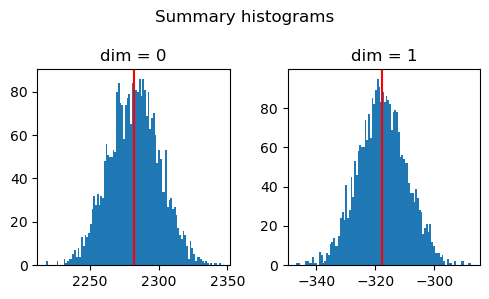

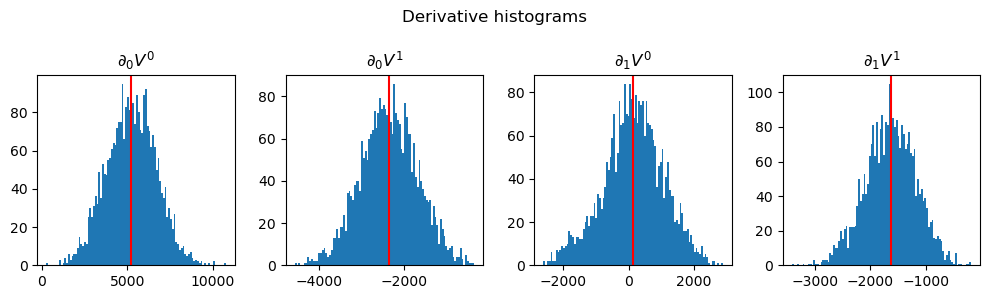

In [91]:
# import plotContours2D, plotSummaryDerivativeHists, plot_derivative_convergence
plotSummaryDerivativeHists(fisher)

In [16]:
def readFromFile(fileName) :
    f = open(fileName, "rb")
    PD = pickle.load(f)
    f.close()
    return PD
op = readFromFile('/Users/karthikviswanathan/Desktop/TDA/codes/fisherPH/versions/TopoFisher/topofisher/cluster/outputs/run0/op.pkl')

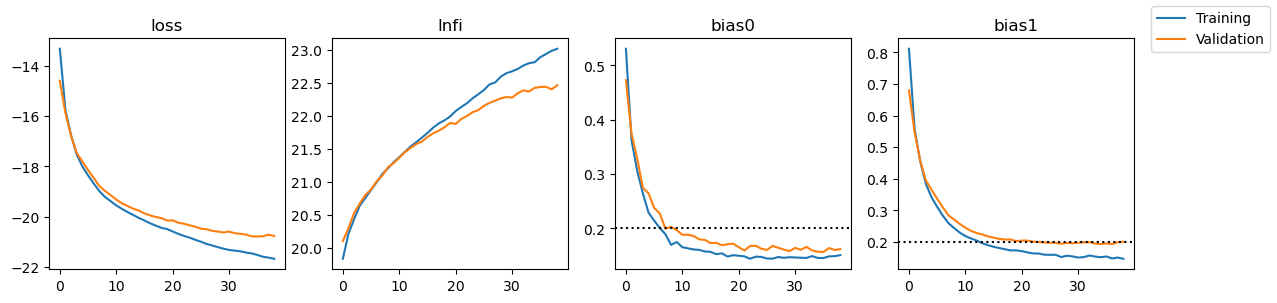

In [32]:
op.keys()
ncols = 4
fig, axes = plt.subplots(nrows=1, ncols= ncols, figsize=(3 * ncols + 2 , 3))
lis = ['loss', 'lnfi', 'bias0', 'bias1']
for idx in range(4) :
    axes[idx].plot(op[lis[idx]][1:], label = "Training")
    axes[idx].plot(op['val_' + lis[idx]][1:], label = "Validation")
    if "bias" in lis[idx]: axes[idx].axhline(0.2, linestyle = 'dotted', c = 'black')
    axes[idx].set_title(lis[idx])
common_legend = fig.legend(labels=['Training', 'Validation'])  # Adjust the location as needed
# plt.tight_layout()

#### Rough

In [ ]:
import sklearn
def cleanPDFast(pd):
    # Extract dimensions and conditions
    dimensions = pd[:, 0]
    cond_dim2 = (dimensions == 2) & (pd[:, 2] != pd[:, 1]) & (pd[:, 2] > 0)
    cond_dim1 = (dimensions == 1) & (pd[:, 2] != pd[:, 1]) & (pd[:, 2] > 0)
    cond_dim0 = (dimensions == 0) &(~np.isinf(pd[:, 2])) & (pd[:, 2] != pd[:, 1])

    # Filter data based on conditions
    p2 = pd[cond_dim2][:, 1:]
    p1 = pd[cond_dim1][:, 1:]
    p0 = pd[cond_dim0][:, 1:]

    return p0, p1, p2

def PI(sigma=None, pd=None, bounds=None, res=[30, 30]):
    pers = pd[:, 1] - pd[:, 0]
    bp = np.array([pd[:, 0], pd[:, 1] - pd[:, 0]]).T
    kde = sklearn.neighbors.KernelDensity(bandwidth=sigma, algorithm='kd_tree', \
                                kernel='epanechnikov').fit(bp, sample_weight = pers)
    
    x = np.linspace(bounds[0], bounds[1], res[0])
    y = np.linspace(bounds[2], bounds[3], res[1])
    xx, yy = np.meshgrid(x, y)
    xx = xx.ravel()
    yy = yy.ravel()
    xy_sample = np.array([[xx[i], yy[i]] for i in range(len(xx))])
    d = np.exp(kde.score_samples(xy_sample))

    return np.reshape(d, (res[1], res[0])) * sum(pers)

def calcSavePI(diag, sample=None):     
    p0, p1, p2 = cleanPDFast(diag)  # pX = [[birth, persistence], [item 2], [item 3]]

    bounds = np.load("bounds.npy")
    bound0 = bounds[0]
    bound1 = bounds[1]
    bound2 = bounds[2]
        
    res_len = 200
    img0=PI(5*min([(bound0[2]-bound0[0])/res_len,(bound0[3])/res_len]),p0,[0.9*bound0[0],1.1*bound0[2],0,1.1*bound0[3]],res=[res_len,res_len]) 
    img1=PI(5*min([(bound1[2]-bound1[0])/res_len,(bound1[3])/res_len]),p1,[0.9*bound1[0],1.1*bound1[2],0,1.1*bound1[3]],res=[res_len,res_len])
    img2=PI(5*min([(bound2[2]-bound2[0])/res_len,(bound2[3])/res_len]),p2,[0.9*bound2[0],1.1*bound2[2],0,1.1*bound2[3]],res=[res_len,res_len]) 

    return [img0, img1, img2]

diag = np.load("/Users/karthikviswanathan/Downloads/fiducial_575_600_15/fiducial_0_3_1099_15.npy")
# diag = [[elm[0], [elm[1], elm[2]]] for elm in diag]  # [dimension, [birth, death]]
%timeit -n 1 -r 1  imgs = calcSavePI(diag)

In [ ]:
def cleanPD(pd, cut, power=0.5):
    p0 = []
    p1 = []
    p2 = []
    for elm in pd:
        if elm[0] == 2 and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:
            p2.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])
        elif elm[0] == 1 and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:
            p1.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)]) 
        elif (np.isinf(elm[1][1])) == False and elm[1][1] != elm[1][0] and elm[1][1] > (float(cut) / 2)**2:
            p0.append([np.power(elm[1][0], power), np.power(elm[1][1] - elm[1][0], power)])
    return np.array(p0), np.array(p1), np.array(p2)

def PI(sigma=None, pd=None, bounds=None, res=[30, 30]):
    kde = sklearn.neighbors.KernelDensity(bandwidth=sigma, algorithm='kd_tree', \
                                          kernel='epanechnikov').fit(pd, sample_weight=[elm[1] for elm in pd])
    
    x = np.linspace(bounds[0], bounds[1], res[0])
    y = np.linspace(bounds[2], bounds[3], res[1])
    # print(x)
    xx, yy = np.meshgrid(x, y)
    xx = xx.ravel()
    yy = yy.ravel()
    xy_sample = np.array([[xx[i], yy[i]] for i in range(len(xx))])
    d = np.exp(kde.score_samples(xy_sample))
    return np.reshape(d, (res[1], res[0])) * sum([elm[1] for elm in pd])

def calcSavePI(diag, res_len = 100, sample=None):       
    dimPow = 1
    power = float(dimPow)
    p0, p1, p2 = cleanPD(diag, 0, power)  # pX = [[birth, persistence], [item 2], [item 3]]

    bounds = np.load("bounds.npy")
    bound0 = bounds[0]
    bound1 = bounds[1]
    bound2 = bounds[2]
        
    img0=PI(5*min([(bound0[2]-bound0[0])/res_len,(bound0[3])/res_len]),p0,\
            [0.9*bound0[0],1.1*bound0[2],0,1.1*bound0[3]],res=[res_len,res_len]) 
    img1=PI(5*min([(bound1[2]-bound1[0])/res_len,(bound1[3])/res_len]),p1,\
            [0.9*bound1[0],1.1*bound1[2],0,1.1*bound1[3]],res=[res_len,res_len])
    img2=PI(5*min([(bound2[2]-bound2[0])/res_len,(bound2[3])/res_len]),p2,\
            [0.9*bound2[0],1.1*bound2[2],0,1.1*bound2[3]],res=[res_len,res_len]) 

    return [img0, img1, img2]

diag = np.load("/Users/karthikviswanathan/Downloads/fiducial_575_600_15/fiducial_0_3_1099_15.npy")
diag = [[elm[0], [elm[1], elm[2]]] for elm in diag]  # [dimension, [birth, death]]
imgs = calcSavePI(diag)

In [ ]:
imgs[0].shape

In [ ]:
def writeToFile(lis, fileName):
    g = open(fileName, "wb")
    pickle.dump(lis, g)
    g.close()
%timeit -n 1 -r 1 writeToFile(imgs, "rand.pkl")

In [ ]:
np.max([np.abs(imgs[idx] - imgs2[idx]) for idx in range(3)])

In [ ]:
def plot_persistence_image(imgs):
    """
    Plot persistence images for the persistence diagrams corresponding to 
    the pds_idx_list.

    Parameters:
        st: Simplex tree.
    """
    ncols = 3
    fig, axes = plt.subplots(nrows=1, ncols= ncols, \
                             figsize=(3 * ncols + 2 , 3))
    for idx in range(ncols):
        ax = axes[idx]
        ax.imshow(np.flip(imgs[idx][:, :], axis = 0))
        ax.set_title("PI for hom_dim = " + str(idx))
        print(np.max(imgs[idx]))
    plt.tight_layout()
    plt.show()
plot_persistence_image(imgs)

In [ ]:
diag = np.load("/Users/karthikviswanathan/Downloads/fiducial_575_600_15/fiducial_0_3_1099_15.npy")
def cleanPDFast(pd):
    # Extract dimensions and conditions
    dimensions = pd[:, 0]
    cond_dim2 = (dimensions == 2) & (pd[:, 2] != pd[:, 1]) & (pd[:, 2] > 0)
    cond_dim1 = (dimensions == 1) & (pd[:, 2] != pd[:, 1]) & (pd[:, 2] > 0)
    cond_dim0 = (dimensions == 0) &(~np.isinf(pd[:, 2])) & (pd[:, 2] != pd[:, 1])

    # Filter data based on conditions
    p2 = pd[cond_dim2][:, 1:]
    p1 = pd[cond_dim1][:, 1:]
    p0 = pd[cond_dim0][:, 1:]

    return [p0, p1, p2]
diags = cleanPDFast(diag)

In [ ]:
res = 40
pi_vec_layer = PersistenceImages(resolutions = [[res, res], [res, res], [res, res]], bandwidths = [2., 2., 2.])
vecs = %timeit -n 1 -r 1 pi_vec_layer.vectorize_persistence_diagrams(diags)

In [ ]:
pi_vec_layer.plot_persistence_image(diags)

## LC_m

### Training a NN

In [33]:
import pickle
def readFromFile(fileName):
    f = open(fileName, "rb")
    PD = pickle.load(f)
    f.close()
    return PD
directory_path = '/Users/karthikviswanathan/Downloads/topk_vec (1).pkl'
vecs = readFromFile(directory_path)[0]

### Some plots

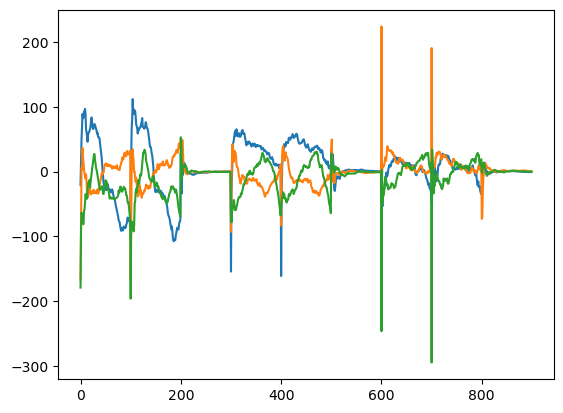

In [34]:
plt.plot((vecs['Fidu'][:3] - vecs['Fidu'].mean(axis = 0)).T)

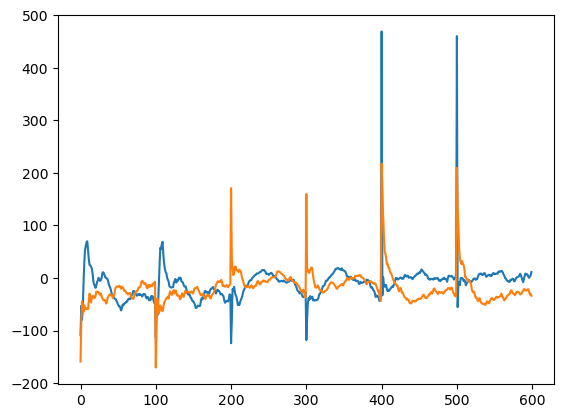

In [100]:
# plt.plot((vecs['Fidu'][:3] - vecs['Fidu'].mean(axis = 0)).T)
# plt.plot((vecs['LC_m'][:3] - vecs['Fidu'].mean(axis = 0)).T)
ind1, ind2 = np.random.randint(500), np.random.randint(500)
plt.plot((vecs['LC_m'][ind1:ind1+1] - vecs['Fidu'].mean(axis = 0)).T)
plt.plot((vecs['LC_p'][ind2:ind2+1] - vecs['Fidu'].mean(axis = 0)).T)

### Training

In [47]:
import keras
x0, x1, x2 = vecs['Fidu'], vecs['LC_m'], vecs['LC_p'] 
y0, y1, y2 = 0*np.ones(x0.shape[0], dtype = np.int32), 1*np.ones(x1.shape[0], dtype = np.int32), \
                 2*np.ones(x2.shape[0], dtype = np.int32)
y0, y1, y2 = [keras.utils.to_categorical(item, 3) for item in [y0, y1, y2]]
# temp_data = np.concatenate([x0, x1, x2], axis = 0)
# temp_labels = np.concatenate([y0, y1, y2], axis = 0)

In [45]:
len(x2)

1500

In [48]:
temp_data = np.concatenate([x0, x1, x2], axis = 0)
temp_labels = np.concatenate([y0, y1, y2], axis = 0)

In [49]:
# Combine data and labels
dataset = tf.data.Dataset.from_tensor_slices((temp_data, temp_labels))

# Set a random seed for shuffling
seed = 42

# Shuffle the combined dataset consistently
dataset = dataset.shuffle(buffer_size=len(temp_data), seed=seed)

# Separate data and labels back from the shuffled dataset
shuffled_data, shuffled_labels = zip(*dataset)

# Convert them to NumPy arrays (if needed)
shuffled_data = np.array(list(shuffled_data))
normalized_data = tf.math.divide(tf.subtract(shuffled_data, tf.reduce_mean(shuffled_data, axis=0)),\
                                 tf.math.reduce_std(shuffled_data, axis=0))
data = normalized_data.numpy()
labels = np.array(list(shuffled_labels))

In [51]:
# Split your data into training (60%), validation (20%), and testing (20%) sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.33, random_state=42)
validation_data, test_data, validation_labels, test_labels = train_test_split(test_data, test_labels, test_size=0.01, random_state=42)


In [60]:
validation_data.shape

(1796, 900)

In [56]:
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(input_shape,)),  # If your data is not already flattened
    keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(.2),
    # keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(labels.shape[-1], activation='softmax')  # Adjust num_classes based on your classification problem
])

In [58]:
model.compile(optimizer='adam',  # You can choose other optimizers
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
model.fit(train_data, train_labels, epochs = 100, verbose = 1, validation_data=(validation_data, validation_labels), batch_size = 512)

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 1.2836 - accuracy: 0.4407 - val_loss: 0.9553 - val_accuracy: 0.5557
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.9492 - accuracy: 0.5547 - val_loss: 0.7844 - val_accuracy: 0.6225
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.8821 - accuracy: 0.5862 - val_loss: 0.7567 - val_accuracy: 0.6559
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8113 - accuracy: 0.6347 - val_loss: 0.7270 - val_accuracy: 0.6732
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7527 - accuracy: 0.6543 - val_loss: 0.7128 - val_accuracy: 0.6826
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7501 - accuracy: 0.6551 - val_loss: 0.7005 - val_accuracy: 0.6865
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7262 - accuracy: 0.6668 - val_loss: 0.6960 - val_accuracy: 0.6810
Epoch 8/100
8/8 [====

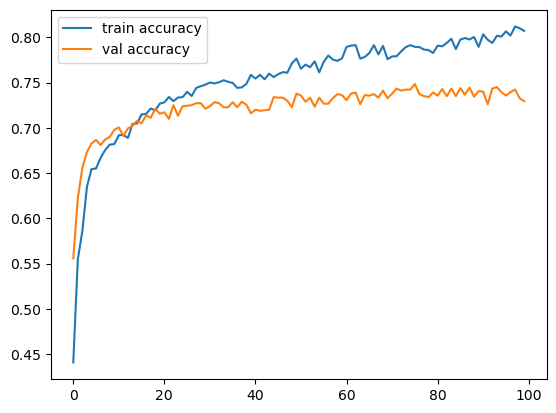

In [59]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val accuracy')
plt.legend()

### Training on just 2 classes

In [69]:
x0, x1 = vecs['Fidu'], vecs['LC_p'] 
y0, y1 = 0*np.ones(x0.shape[0], dtype = np.int32), 1*np.ones(x1.shape[0], dtype = np.int32)
               

In [70]:
temp_data = np.concatenate([x0, x1], axis = 0)
temp_labels = np.concatenate([y0, y1], axis = 0)

In [71]:
# Combine data and labels
dataset = tf.data.Dataset.from_tensor_slices((temp_data, temp_labels))

# Set a random seed for shuffling
seed = np.random.randint(1000)

# Shuffle the combined dataset consistently
dataset = dataset.shuffle(buffer_size=len(temp_data), seed=seed)

# Separate data and labels back from the shuffled dataset
shuffled_data, shuffled_labels = zip(*dataset)

# Convert them to NumPy arrays (if needed)
shuffled_data = np.array(list(shuffled_data))
normalized_data = tf.math.divide(tf.subtract(shuffled_data, tf.reduce_mean(shuffled_data, axis=0)), tf.math.reduce_std(shuffled_data, axis=0))
data = normalized_data.numpy()
labels = np.array(list(shuffled_labels))

In [72]:
# Split your data into training (60%), validation (20%), and testing (20%) sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.33, random_state=42)
validation_data, test_data, validation_labels, test_labels = train_test_split(test_data, test_labels, test_size=0.01, random_state=42)


In [73]:
train_labels.shape

(2680,)

In [74]:
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(input_shape,)),  # If your data is not already flattened
    # keras.layers.Dense(16, activation='relu'),
   # keras.layers.Dense(10, activation='relu'),
   # keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2), \
    keras.layers.Dense(1, activation='sigmoid')  # Adjust num_classes based on your classification problem
])
model.compile(optimizer='adam',  # You can choose other optimizers
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
model.fit(train_data, train_labels, epochs = 100, verbose = 0, validation_data=(validation_data, validation_labels), batch_size = 256)

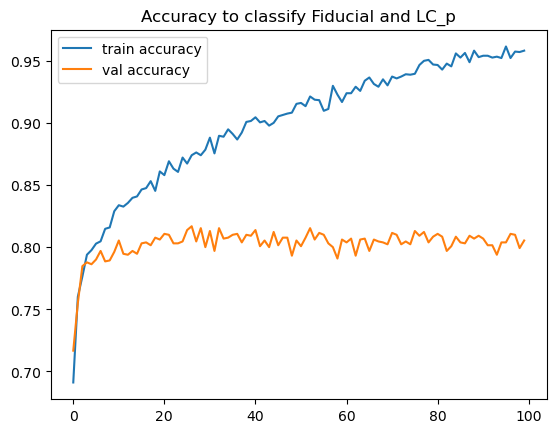

In [76]:
plt.plot( model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy to classify Fiducial and LC_p')
plt.legend()
plt.show()

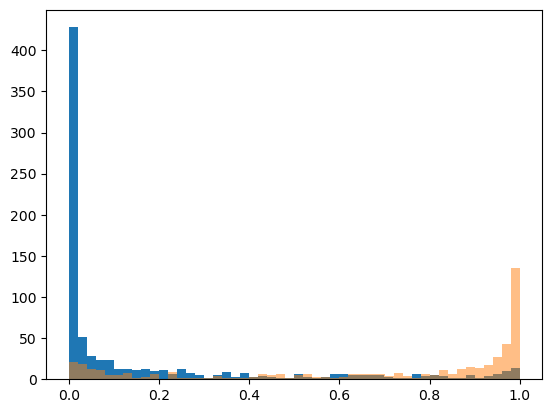

In [78]:
plt.hist(model(np.array([validation_data[idx] for idx in range(len(validation_data)) if validation_labels[idx] == 0])).numpy().flatten(), bins = 50)
plt.hist(model(np.array([validation_data[idx] for idx in range(len(validation_data)) if validation_labels[idx] == 1])).numpy().flatten(), bins = 50, alpha = 0.5)
plt.show()

### Fisher analysis

#### $\Omega_m$

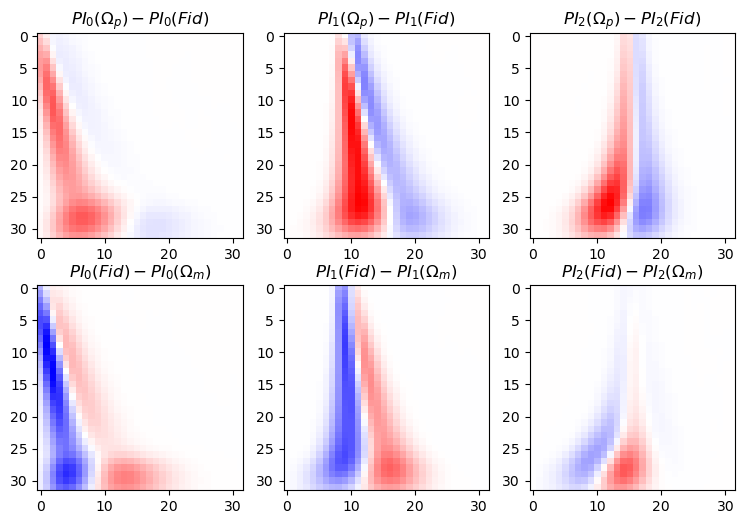

In [121]:
diff1, diff2 = avm[2] - avm[0], avm[0] - avm[1]
ncols = 2
fig, axes = plt.subplots(nrows = 2, ncols= 3, \
                             figsize=(3 * ncols + 3 , 6))

for idx in range(3):
    vm2 = np.max([np.max(np.abs(diff1[:, :, idx])), np.max(np.abs(diff2[:, :, idx]))])
    axes[0][idx].imshow(np.flip(diff1[:, :, idx], axis = 0), cmap = 'bwr', vmin = -vm2, vmax = vm2)
    axes[0][idx].set_title( "$PI_{}(\Omega_p) - PI_{}(Fid)$".format(idx, idx))
    axes[1][idx].imshow(np.flip(diff2[:, :, idx], axis = 0), cmap = 'bwr', vmin = -vm2, vmax = vm2)
    axes[1][idx].set_title( "$PI_{}(Fid) - PI_{}(\Omega_m)$".format(idx, idx))

In [33]:
fish = fisherMOPED([vecs['Fidu'][:, :200], vecs['LC_m'][:, :200], vecs['LC_p'][:, :200]], np.array([0.1])) 

In [34]:
show_fm_and_bias(fish)

FM =  [110.35]
Fractional bias =  [1.45]


(array([ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  7.,  6.,  6.,  6.,  3.,
        11.,  9., 10., 16., 20., 18., 24., 21., 19., 30., 21., 18., 23.,
        22., 27., 28., 22., 20., 21., 14., 13.,  7., 12.,  6.,  8.,  8.,
         6.,  3.,  4.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([-79553.125    , -79475.171875 , -79397.21875  , -79319.2578125,
        -79241.3046875, -79163.3515625, -79085.3984375, -79007.4375   ,
        -78929.484375 , -78851.53125  , -78773.578125 , -78695.6171875,
        -78617.6640625, -78539.7109375, -78461.7578125, -78383.796875 ,
        -78305.84375  , -78227.890625 , -78149.9375   , -78071.9765625,
        -77994.0234375, -77916.0703125, -77838.1171875, -77760.15625  ,
        -77682.203125 , -77604.25     , -77526.296875 , -77448.34375  ,
        -77370.3828125, -77292.4296875, -77214.4765625, -77136.5234375,
        -77058.5625   , -76980.609375 , -76902.65625  , -76824.703125 ,
        -76746.7421875, -76668.7890625, -76590.8359375, -76512.88281

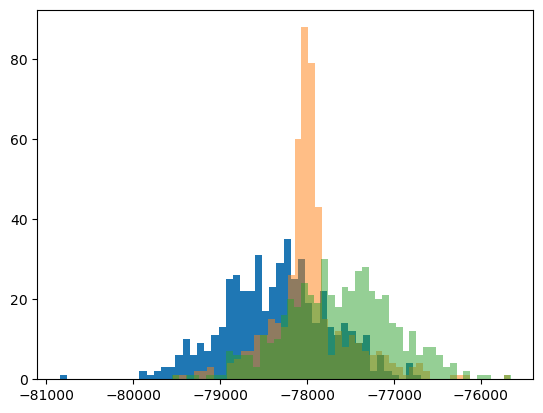

In [40]:
bins = 50
plt.hist(vecs['LC_m'][:, :200] @ fish.moped_compmat.numpy(), bins = bins)
plt.hist(vecs['Fidu'][:, :200] @ fish.moped_compmat.numpy(), alpha = 0.5, bins = bins)
plt.hist(vecs['LC_p'][:, :200] @ fish.moped_compmat.numpy(), alpha = 0.5, bins = bins)